# Scikit Learn
This notebook will introduce you to scikit learn, the prefered python package for *classical* machine learning.  Scikit learn has all the standard machine learning approaches and uses a common syntax making it easy to try different methods. It is very popular, well-documented with great tutorials etc (I'm using several of them for this course!), and advice on usage cases for the different methods: it will be easy to get help if you ever get stuck. So, if you want to use a popular, well-established (e.g. not deep learning, or something that just came out) machine learning approach sckit learn is where you should start. For more details be sure to check out their web-site: http://scikit-learn.org/stable/index.html

## Getting started
Scikit learn comes pre-installed in the environment you are using for this course. On other machines you may need to install it. See here for instructions: http://scikit-learn.org/stable/install.html. Once you have it installed, you can simply import the library like any other.

## Organization
Like most large python libraries scikit learn is organized hierarchically, so you will only need to import the parts relevant to you. For example:

* sklearn: this is how scikit-learn is referenced in python
    * datasets: this contains various classic machine learning data sets
        * digits: The collection of pictures of numbers that we will use extensively
        * diabetes: The data-set you used in the previous lecture
        * and many more
    * linear: linear-models
        * LinearRegression
        * LogisticRegression: which you used in your last exercise
    * decomposition: unsupervised dimension reduction approaches
        * PCA: principal component analysis
        * NMF: non-negative matrix factorization
        * FastICA: Independant component analysis
    * manifold: distance based embedding techniques
        * MDS: multi-dimensional scaling
        * TSNE: tSNE
    * clustering:various clustering approaches we will discuss  
    * svm: support vector machines
    * other supervised classifiers

So to get some of this started you would:

In [1]:
from sklearn import datasets # for various test data sets
from sklearn import decomposition # for PCA. ICA, nNMF
from sklearn import manifold # MDS, tSNE

# then to use it you might go like
digits = datasets.load_digits(n_class=6)

# While we're at it, lets load a few other things we will need
import numpy as np
import matplotlib.pyplot as plt

## Syntax
As mentioned earlier, scikit learn does a great job of using a common syntax shared across the different approaches. This syntax can be divided into the various parts of applying a machine learning approach:
1. Model Definition: This is where you define what kind of machine learning approach you want to use and potentially set relevant parameter. 
    - The syntax for this essentially is just invoking the appropriate function.
    - e.g. `nnmf = decomposition.NMF(n_components=2)` would initialize a 2-component nnMF model
    - e.g. `logistic = linear_model.LogisticRegression(C=1e5)` is the syntax for logistic regression with inverse resularization strength `C`
    - The function parameters are function specific, but typically shared across functions of the same class. Example `PCA`, `NMF` and `FastICA` all accept the `n_components=` argument
    - At this point, no analysis has been performed
    - Various model parameters (e.g. the principal components for PCA) will be stored inside this model eventually.
2. Model Fit: This is where you fit your model to the data by performing analysis to learn the internal parameters for the model.
    - This step typically doesn't need to produce any output classification
    - syntax is of the form `model.fit(data1,...)`
    - e.g. for an unsupervised approach like nnmf you might say something like `nnmf.fit(X)` where `X` is a numpy array containing your data
    - similarly for a supervised approach you might use something like `logistic.fit(trainingData, trainingLabels)` where the two inputs are arrays containing training data and the corresponding training labels respectively
    - These function calls will automatically update the appropriate parameters inside the model (e.g., `nnmf` or `logistic` above).
3. Analyze Data: The fitted model is used to analyze data
    - This takes the form `output=model.transform(data)` for most unsupervised methods 
    - and `predictedLabel=model.predict(data)` for most supervised methods


Note: for unsupervised methods you can use the `fit_transform` to at once perform the model fit and produce the analysis result on that data

(1083, 64)


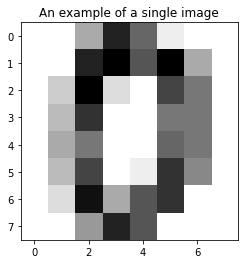

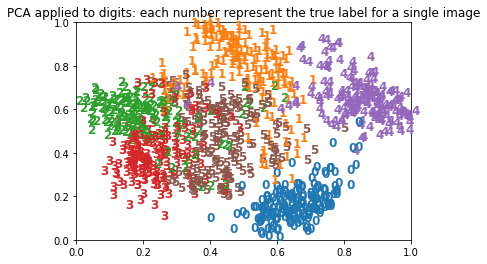

In [21]:
# Here is an unsupervised example with PCA

# Lets work with the digits data which contains 8x8 pixel images for handwritten digits
X = digits.data # load data for the digits, each 8x8 image is stored as a 64 dimensional row in the array
y = digits.target # the true number represented by the image
print(X.shape)
plt.imshow(X[0,:].reshape(8,8),cmap=plt.cm.binary)
plt.title('An example of a single image')
plt.show()

# For your exercise you will need to replace these 3 lines
pca = decomposition.PCA(n_components=2)
pca.fit(X)
outCoords=pca.transform(X)

plt.figure()
ax = plt.subplot(111)
x_min, x_max = np.min(outCoords, 0), np.max(outCoords, 0)
outCoordsScaled = (outCoords - x_min) / (x_max - x_min)
for i in range(X.shape[0]):
    plt.text(outCoordsScaled[i, 0], outCoordsScaled[i, 1], str(y[i]),
                color=plt.cm.tab20(y[i] / 10.),fontdict={'weight': 'bold', 'size': 12})
plt.title('PCA applied to digits: each number represent the true label for a single image')    
plt.show()

## Your exercise
Repeat this analysis using nNMF and tSNE.